<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%ED%83%9D%EC%8B%9C%EB%B9%84%20%EC%9D%B8%EC%83%81%20%EC%9D%B4%ED%9B%84%20%EA%B7%80%EA%B0%80%20%ED%8C%A8%ED%84%B4%20%EB%B3%80%ED%99%94%20%EB%B6%84%EC%84%9D/%EC%9C%A0%ED%8A%9C%EB%B8%8C%20%EB%8C%93%EA%B8%80%20%EC%9B%8C%EB%93%9C%20%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%2C%20%ED%86%A0%ED%94%BD%20%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import io
from google.colab import files

In [ ]:
file_uploaded=files.upload()

Saving cleaned_taxinews_all.csv to cleaned_taxinews_all.csv


In [ ]:
taxinews_df = pd.read_csv(io.BytesIO(file_uploaded['cleaned_taxinews_all.csv']))

taxinews_df.head()

,Comment,Cleaned_Comment
0,버스 탈려고 해도 문제. 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림. 중...,버스 탈려고 해도 문제 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림 중앙 ...
1,분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 ...,분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 ...
2,택시는 대중교통 아니고 고급이용 수단입니다\n택시비 없으면 대중교통이용하세요\n물가...,택시는 대중교통 아니고 고급이용 수단입니다 택시비 없으면 대중교통이용하세요 물가에 ...
3,아직 우리에겐 심야버스가 있다..,아직 우리에겐 심야버스가 있다
4,이제 점점 심야 문화 자체가 없어질꺼같다...,이제 점점 심야 문화 자체가 없어질꺼같다


In [ ]:
doc_origin = taxinews_df['Cleaned_Comment'].to_list()
doc_origin

['버스 탈려고 해도 문제 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림 중앙 차로 생긴 후 낮 시간대는 좋은데 밤에는 더 막힘 특히 논현양재 시민의숲 구간 게다가 5030지랄 같은 제도 후로 더 심해졌고',
 '분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 100 찬성으로 인상할 것이다',
 '택시는 대중교통 아니고 고급이용 수단입니다 택시비 없으면 대중교통이용하세요 물가에 맞춰서 요금 올리는거지 본인 직장에서 연봉동결 시키고 몇년에 한번 천원 올리면 개 거품 물겁니다 어중이 떠중이 안타면 정말로 택시이용하시는분들은 쾌적하게 이용하실수 있을겁니다',
 '아직 우리에겐 심야버스가 있다',
 '이제 점점 심야 문화 자체가 없어질꺼같다',
 '여태까지 진짜 싼맛에 이용잘했습니다 10년만에 두번인상이라니 모든물가집값인건비고공상승하는데 애들 썻습니다 이젠 진짜 탈사람만 타게되서 택시는 잘잡히겠습니다',
 '택시기사분들은 요금인상 별로 환영 안하던데 손님 그만큼 준다고 차라리 빠르게 한분더 태우는게 낫다네요',
 '500만원짜리 오토바이 보험료 400연 치킨1박스 5000원 VS 2300만원짜리 차 면허 8700만원 보험료 250연으로 술먹은 괴물4명 여기저기 들르면서 집앞까지 데려다주기 6700원',
 '택시비 더 올려야한다 개나소나 택시타고 다니는게 한국임 원래 택시는 비싼 서비스여야 되는거야 그러면 당연히 서비스 질도 오르겠지',
 '기본요금 너무 싸다최소 만원은 해야 골라 태우기 없어진다',
 '난 20살 때 부터 차 타고 다녀서 그런가 택시비가 젤 아까운 거 같아서 웬만하면 술자리는 걸어다니는데 아님 대리나 택시비 엄청 비싸다',
 '전과자 고령의 노인 양아치들은 택시기사 못하게 하고 기본 요금을 만원까지 올려야합니다',
 '택시비 비싸다고 기절하는 사람들이 넘쳐나겠구만 문제는 버스비도 오르고 추울때는 버스 기다리는 것도 정말 곤욕이지 버스는 미치도록 안오고 택시는 비싸다고 고민되고 중간에 끼여서 사람 환장한다',
 

In [ ]:
df = taxinews_df.drop('Comment', axis=1)
print(df.head())

                                     Cleaned_Comment
0  버스 탈려고 해도 문제 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림 중앙 ...
1  분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 ...
2  택시는 대중교통 아니고 고급이용 수단입니다 택시비 없으면 대중교통이용하세요 물가에 ...
3                                   아직 우리에겐 심야버스가 있다
4                             이제 점점 심야 문화 자체가 없어질꺼같다


In [ ]:
df1=df.rename(columns={'Cleaned_Comment':'Comment'})
df1

,Comment
0,버스 탈려고 해도 문제 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림 중앙 ...
1,분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 ...
2,택시는 대중교통 아니고 고급이용 수단입니다 택시비 없으면 대중교통이용하세요 물가에 ...
3,아직 우리에겐 심야버스가 있다
4,이제 점점 심야 문화 자체가 없어질꺼같다
...,...
7476,택시기사들 다 사형해라
7477,택시기사의 도덕성은 안좋지만 이걸가지고 택시기사를 욕할 필요는 없을듯 법을 더 강화...
7478,레게노
7479,택시 기사는 영원히 구제불능ㅋ 저러니 이미지 개차반이지 엠블란스 처막질않나ㅋ


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:
import re

def apply_regular_expression(Comment):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', Comment)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [ ]:
apply_regular_expression(df1['Comment'][1])

'분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원  찬성으로 인상할 것이다'

In [ ]:
from konlpy.tag import Okt
from collections import Counter

In [ ]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df1['Comment'][1]))
nouns

['사실',
 '서울시',
 '의원',
 '의원',
 '택시',
 '요금',
 '인상',
 '미로',
 '의원',
 '운영',
 '비',
 '의원',
 '찬성',
 '인상',
 '것']

In [ ]:
# 말뭉치 생성: 전체 말뭉치에 적용해서 명사 형태소 추출
df1.to_string()
df2=df1['Comment'].fillna("", inplace=True)
corpus = "".join(df1['Comment'].tolist())
corpus
# 정규 표현식 적용
apply_regular_expression(corpus)
# 전체 말뭉치(corpus)에서 명사 형태소 추출
w1= okt.nouns(apply_regular_expression(corpus))
print(w1)

['버스', '해도', '문제', '예전', '분', '거리', '요즘', '시간', '이상', '중앙', '차로', '후', '낮', '시간대', '밤', '더', '논현', '양재', '시민', '숲', '구간', '게다가', '지랄', '제도', '후', '더', '사실', '서울시', '의원', '의원', '택시', '요금', '인상', '미로', '의원', '운영', '비', '의원', '찬성', '인상', '것', '택시', '대중교통', '고급', '이용', '수단', '택시', '비', '대중교통', '물가', '요금', '본인', '직장', '연봉', '동결', '년', '한번', '천원', '개', '거품', '물', '어중', '중이', '안타', '택시', '분', '이용', '우리', '심야버스', '이제', '점점', '심야', '문화', '자체', '여태', '진짜', '맛', '이용', '년', '번인', '물가', '집값', '인건비', '고공', '상승', '데', '애', '썻습니', '젠', '진짜', '탈', '사람', '택시', '택시', '기사', '요금인상', '별로', '환영', '손님', '차라리', '분더', '만원', '오토바이', '보험료', '연', '치킨', '박스', '원', '만원', '차', '면허', '만원', '보험료', '연', '술', '괴물', '여기저기', '집앞', '택시', '비', '더', '개', '나소', '택시', '타고', '한국', '임', '원래', '택시', '서비스', '여야', '서비스', '질도', '요금', '최소', '만원', '살', '때', '부터', '차', '타고', '런가', '택시', '비', '젤', '거', '술자리', '대리', '택시', '비', '전과자', '고령', '노인', '아치', '택시', '기사', '기본', '요금', '만원', '택시', '비', '기절', '사람', '문제', '버스비', '때', '버스', '것', '정말', 

In [ ]:
#특정단어 불용어로 지정
stopwords = ['택시','인상','요금','택시요금']

In [ ]:
#전처리가 안된 단어들이 있어서 다시 해주기

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

w2 = [x for x in w1 if len(x) > 1]  # 한글자 키워드 제거
w3 = [x for x in w2 if x not in stopwords]  # 불용어 제거
w3

['버스',
 '해도',
 '문제',
 '예전',
 '거리',
 '요즘',
 '시간',
 '이상',
 '중앙',
 '차로',
 '시간대',
 '논현',
 '양재',
 '시민',
 '구간',
 '게다가',
 '지랄',
 '제도',
 '사실',
 '서울시',
 '의원',
 '의원',
 '미로',
 '의원',
 '운영',
 '의원',
 '찬성',
 '대중교통',
 '고급',
 '이용',
 '수단',
 '대중교통',
 '물가',
 '본인',
 '직장',
 '연봉',
 '동결',
 '한번',
 '천원',
 '거품',
 '어중',
 '중이',
 '안타',
 '이용',
 '우리',
 '심야버스',
 '이제',
 '점점',
 '심야',
 '문화',
 '자체',
 '여태',
 '진짜',
 '이용',
 '번인',
 '물가',
 '집값',
 '인건비',
 '고공',
 '상승',
 '썻습니',
 '진짜',
 '사람',
 '기사',
 '요금인상',
 '별로',
 '환영',
 '손님',
 '차라리',
 '분더',
 '만원',
 '오토바이',
 '보험료',
 '치킨',
 '박스',
 '만원',
 '면허',
 '만원',
 '보험료',
 '괴물',
 '여기저기',
 '집앞',
 '나소',
 '타고',
 '한국',
 '원래',
 '서비스',
 '여야',
 '서비스',
 '질도',
 '최소',
 '만원',
 '부터',
 '타고',
 '런가',
 '술자리',
 '대리',
 '전과자',
 '고령',
 '노인',
 '아치',
 '기사',
 '기본',
 '만원',
 '기절',
 '사람',
 '문제',
 '버스비',
 '버스',
 '정말',
 '곤욕',
 '버스',
 '고민',
 '중간',
 '사람',
 '영업',
 '식당',
 '술집',
 '모두',
 '장사',
 '일찍',
 '귀가',
 '라야',
 '기사',
 '보시',
 '손님',
 '하자',
 '써비',
 '기사',
 '고생',
 '호웅',
 '과연',
 '써비스',
 '얼마나',
 '최상',
 '서비스',
 '타고',
 '바로',
 '대중교통

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(w3)
print(counts)

Counter({'기사': 1050, '사람': 661, '할증': 530, '시간': 529, '생각': 417, '진짜': 405, '버스': 373, '손님': 347, '가격': 328, '타고': 326, '우버': 319, '대중교통': 315, '그냥': 306, '서비스': 296, '이용': 291, '이제': 287, '안타': 274, '만원': 263, '일찍': 256, '물가': 248, '기자': 224, '지하철': 216, '문제': 196, '기본': 194, '운행': 194, '정도': 189, '회사': 176, '거리': 172, '지금': 168, '다시': 165, '나라': 154, '운전': 154, '시민': 143, '국민': 140, '일본': 137, '때문': 134, '서울': 133, '심야': 130, '월급': 130, '개인': 128, '천원': 125, '도입': 124, '서민': 123, '정부': 122, '수요': 120, '대리': 119, '정책': 119, '해결': 117, '승차': 115, '조금': 111, '하나': 108, '회식': 106, '뉴스': 106, '거부': 105, '정말': 104, '한국': 103, '요즘': 100, '누가': 99, '승객': 98, '문화': 97, '자전거': 97, '수준': 93, '귀가': 92, '야간': 90, '다른': 90, '이상': 86, '우리나라': 86, '새벽': 86, '한번': 83, '달라': 83, '계속': 83, '카카오': 81, '상황': 81, '공급': 81, '원래': 80, '도로': 80, '소리': 79, '오른': 79, '수단': 78, '우리': 78, '역시': 76, '예전': 74, '오히려': 73, '수입': 72, '퇴근': 72, '세상': 72, '직업': 72, '개택': 71, '얼마나': 70, '이유': 70, '모든': 70, '건강': 70, '요금

In [ ]:
word=counts.most_common(2000)
word

[('기사', 1050),
 ('사람', 661),
 ('할증', 530),
 ('시간', 529),
 ('생각', 417),
 ('진짜', 405),
 ('버스', 373),
 ('손님', 347),
 ('가격', 328),
 ('타고', 326),
 ('우버', 319),
 ('대중교통', 315),
 ('그냥', 306),
 ('서비스', 296),
 ('이용', 291),
 ('이제', 287),
 ('안타', 274),
 ('만원', 263),
 ('일찍', 256),
 ('물가', 248),
 ('기자', 224),
 ('지하철', 216),
 ('문제', 196),
 ('기본', 194),
 ('운행', 194),
 ('정도', 189),
 ('회사', 176),
 ('거리', 172),
 ('지금', 168),
 ('다시', 165),
 ('나라', 154),
 ('운전', 154),
 ('시민', 143),
 ('국민', 140),
 ('일본', 137),
 ('때문', 134),
 ('서울', 133),
 ('심야', 130),
 ('월급', 130),
 ('개인', 128),
 ('천원', 125),
 ('도입', 124),
 ('서민', 123),
 ('정부', 122),
 ('수요', 120),
 ('대리', 119),
 ('정책', 119),
 ('해결', 117),
 ('승차', 115),
 ('조금', 111),
 ('하나', 108),
 ('회식', 106),
 ('뉴스', 106),
 ('거부', 105),
 ('정말', 104),
 ('한국', 103),
 ('요즘', 100),
 ('누가', 99),
 ('승객', 98),
 ('문화', 97),
 ('자전거', 97),
 ('수준', 93),
 ('귀가', 92),
 ('야간', 90),
 ('다른', 90),
 ('이상', 86),
 ('우리나라', 86),
 ('새벽', 86),
 ('한번', 83),
 ('달라', 83),
 ('계속', 83),
 ('카카오', 81)

# 워드 클라우드

In [ ]:
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
#워드클라우드
#코랩 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이 셀을 먼저 실행 후 런타임을 다시시작하여 실행합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120828 files and direc

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

#코랩 한글폰트 다운로드 후 설정하는 과정

<Figure size 1000x1000 with 0 Axes>

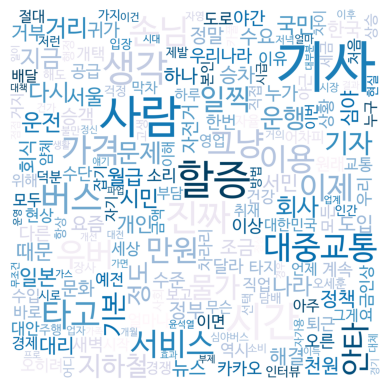

In [ ]:
wc = WordCloud(font_path='NanumBarunGothic', background_color="white", width=1000, height=1000, scale=2.0, max_font_size=150, colormap = 'PuBu')
gen = wc.generate_from_frequencies(counts)
plt.figure(figsize=(10,10))
plt.figure()
plt.axis("off")
plt.imshow(gen)

# LDA

In [ ]:
#LDA
%pip install gensim

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from math import log # IDF 계산을 위해

corpus = w3

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'버스': 2276, '해도': 5976, '문제': 2029, '예전': 3767, '거리': 262, '요즘': 3901, '시간': 3167, '이상': 4219, '중앙': 4959, '차로': 5174, '시간대': 3168, '논현': 1059, '양재': 3518, '시민': 3188, '구간': 594, '게다가': 319, '지랄': 5014, '제도': 4770, '사실': 2699, '서울시': 2861, '의원': 4169, '미로': 2065, '운영': 3956, '찬성': 5202, '대중교통': 1318, '고급': 405, '이용': 4241, '수단': 3021, '물가': 2035, '본인': 2422, '직장': 5072, '연봉': 3711, '동결': 1468, '한번': 5901, '천원': 5246, '거품': 283, '어중': 3549, '중이': 4962, '안타': 3444, '우리': 3932, '심야버스': 3303, '이제': 4261, '점점': 4696, '심야': 3302, '문화': 2033, '자체': 4502, '여태': 3683, '진짜': 5093, '번인': 2294, '집값': 5114, '인건비': 4291, '고공': 404, '상승': 2791, '썻습니': 3334, '사람': 2681, '기사': 804, '요금인상': 3882, '별로': 2345, '환영': 6156, '손님': 2993, '차라리': 5171, '분더': 2503, '만원': 1812, '오토바이': 3809, '보험료': 2402, '치킨': 5390, '박스': 2127, '면허': 1904, '괴물': 562, '여기저기': 3648, '집앞': 5123, '나소': 933, '타고': 5

In [ ]:
corpus = w3

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'버스': 2276, '해도': 5976, '문제': 2029, '예전': 3767, '거리': 262, '요즘': 3901, '시간': 3167, '이상': 4219, '중앙': 4959, '차로': 5174, '시간대': 3168, '논현': 1059, '양재': 3518, '시민': 3188, '구간': 594, '게다가': 319, '지랄': 5014, '제도': 4770, '사실': 2699, '서울시': 2861, '의원': 4169, '미로': 2065, '운영': 3956, '찬성': 5202, '대중교통': 1318, '고급': 405, '이용': 4241, '수단': 3021, '물가': 2035, '본인': 2422, '직장': 5072, '연봉': 3711, '동결': 1468, '한번': 5901, '천원': 5246, '거품': 283, '어중': 3549, '중이': 4962, '안타': 3444, '우리': 3932, '심야버스': 3303, '이제': 4261, '점점': 4696, '심야': 3302, '문화': 2033, '자체': 4502, '여태': 3683, '진짜': 5093, '번인': 2294, '집값': 5114, '인건비': 4291, '고공': 404, '상승': 2791, '썻습니': 3334, '사람': 2681, '기사': 804, '요금인상': 3882, '별로': 2345, '환영': 6156, '손님': 2993, '차라리': 5171, '분더': 2503, '만원': 1812, '오토바이': 3809, '보험료': 2402, '치킨': 5390, '박스': 2127, '면허': 1904, '괴물': 562, '여기저기': 

In [ ]:
tfidfv.vocabulary_

{'버스': 2276,
 '해도': 5976,
 '문제': 2029,
 '예전': 3767,
 '거리': 262,
 '요즘': 3901,
 '시간': 3167,
 '이상': 4219,
 '중앙': 4959,
 '차로': 5174,
 '시간대': 3168,
 '논현': 1059,
 '양재': 3518,
 '시민': 3188,
 '구간': 594,
 '게다가': 319,
 '지랄': 5014,
 '제도': 4770,
 '사실': 2699,
 '서울시': 2861,
 '의원': 4169,
 '미로': 2065,
 '운영': 3956,
 '찬성': 5202,
 '대중교통': 1318,
 '고급': 405,
 '이용': 4241,
 '수단': 3021,
 '물가': 2035,
 '본인': 2422,
 '직장': 5072,
 '연봉': 3711,
 '동결': 1468,
 '한번': 5901,
 '천원': 5246,
 '거품': 283,
 '어중': 3549,
 '중이': 4962,
 '안타': 3444,
 '우리': 3932,
 '심야버스': 3303,
 '이제': 4261,
 '점점': 4696,
 '심야': 3302,
 '문화': 2033,
 '자체': 4502,
 '여태': 3683,
 '진짜': 5093,
 '번인': 2294,
 '집값': 5114,
 '인건비': 4291,
 '고공': 404,
 '상승': 2791,
 '썻습니': 3334,
 '사람': 2681,
 '기사': 804,
 '요금인상': 3882,
 '별로': 2345,
 '환영': 6156,
 '손님': 2993,
 '차라리': 5171,
 '분더': 2503,
 '만원': 1812,
 '오토바이': 3809,
 '보험료': 2402,
 '치킨': 5390,
 '박스': 2127,
 '면허': 1904,
 '괴물': 562,
 '여기저기': 3648,
 '집앞': 5123,
 '나소': 933,
 '타고': 5495,
 '한국': 5886,
 '원래': 3990,
 '서비스': 2854,
 '여

In [ ]:
tfidf = TfidfVectorizer().fit(corpus)
tfidf_doc = tfidf.fit_transform(corpus)
tfidf_doc.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_terms = tfidf.get_feature_names_out()
doc_vector = pd.DataFrame(tfidf_doc.toarray(), columns = tfidf_terms)
doc_vector

,가가,가게,가격,가격결정,가격탄력성,가계,가공,가관,가구,가기,...,흥청망청,희룡함,희망,희생,희희낙락,흰색,히드라,히터,힌철,힘좀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1

,Comment
0,버스 탈려고 해도 문제 예전에 30분 걸리던 거리가 요즘은 1시간 이상 걸림 중앙 ...
1,분명한 사실은 서울시 시의원과 구의원들 택시 요금 인상 빌미로 의원들 운영비 의원 ...
2,택시는 대중교통 아니고 고급이용 수단입니다 택시비 없으면 대중교통이용하세요 물가에 ...
3,아직 우리에겐 심야버스가 있다
4,이제 점점 심야 문화 자체가 없어질꺼같다
...,...
7476,택시기사들 다 사형해라
7477,택시기사의 도덕성은 안좋지만 이걸가지고 택시기사를 욕할 필요는 없을듯 법을 더 강화...
7478,레게노
7479,택시 기사는 영원히 구제불능ㅋ 저러니 이미지 개차반이지 엠블란스 처막질않나ㅋ


In [ ]:
%pip install tqdm
from tqdm import tqdm
from time import sleep

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import files
file_uploaded=files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving taxinews_comment.csv to taxinews_comment (1).csv


In [ ]:
def clean_text(Comment):
    Comment = Comment.replace(".", "").strip()
    Comment = Comment.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    Comment = re.sub(pattern=pattern, repl='', string=Comment)
    return Comment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['NNG', 'NNP', 'VA', 'XR'] and len(s) >1]
    return nouns

def tokenize(df):
    tokenizer = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')
    processed_data = []
    for sent in tqdm(df['Comment']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import csv  # csv 모듈 임포트

# save_processed_data 함수 정의
def save_processed_data(processed_data):
    with open("tokenized_data_"+title, 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)

if __name__ == '__main__':
    file_name = 'taxinews_comment.csv'  # 파일 이름
    title = file_name.split('.')[0]  # 확장자를 제외한 파일 이름 추출

    df = pd.read_csv(io.BytesIO(file_uploaded['taxinews_comment (1).csv']))
    df.columns = ['Comment']
    df.dropna(how='any', inplace=True)
    processed_data = tokenize(df)
    save_processed_data(processed_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7479/7479 [00:03<00:00, 2163.95it/s]


In [ ]:
import re
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("tokenized_data_"+title,'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace("", np.nan)
processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2 = []

for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)

processed_data = processed_data2
processed_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 7479/7479 [00:00<00:00, 246646.17it/s]


[['버스',
  '문제',
  '예전',
  '거리',
  '요즘',
  '이상',
  '중앙',
  '시간대',
  '논현',
  '양재',
  '시민',
  '구간',
  '지랄',
  '제도'],
 ['사실',
  '서울시',
  '의원',
  '의원',
  '택시',
  '요금',
  '인상',
  '빌미',
  '의원',
  '운영비',
  '의원',
  '찬성',
  '인상'],
 ['택시',
  '대중교통',
  '고급',
  '이용',
  '수단',
  '택시',
  '대중교통',
  '이용',
  '물가',
  '요금',
  '본인',
  '직장',
  '연봉',
  '동결',
  '거품',
  '어중',
  '택시',
  '이용',
  '쾌적',
  '이용'],
 ['심야버스'],
 ['심야', '문화', '자체'],
 ['이용', '인상', '물가', '집값', '비고', '공상', '사람', '택시'],
 ['택시', '기사', '요금', '인상', '환영', '빠르'],
 ['오토바이', '보험료', '박스', '면허', '보험료', '괴물', '여기저기'],
 ['택시', '소나', '택시', '한국', '택시', '서비스', '서비스'],
 ['기본요금', '최소', '원은'],
 ['택시', '웬만', '술자리', '대리', '택시', '비싸'],
 ['전과자', '고령', '노인', '양아치', '택시', '기사', '기본', '요금'],
 ['택시',
  '비싸',
  '기절',
  '사람',
  '문제',
  '버스비',
  '버스',
  '곤욕',
  '버스',
  '택시',
  '비싸',
  '고민',
  '중간',
  '사람',
  '환장'],
 ['자영업', '힘들', '식당', '술집', '장사', '귀가', '택시', '기사', '택시', '부담', '기본'],
 ['비스', '기사', '고생', '호웅', '비스'],
 ['최상', '서비스', '택시', '택시', '대중교통'],
 ['기사', '힘드', '시간

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary = corpora.Dictionary(processed_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary.filter_extremes(no_below=2 , no_above=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -7.4218.
[([(0.08945223, '사람'),
   (0.04930817, '생각'),
   (0.03843533, '가격'),
   (0.03722049, '대중교통'),
   (0.034872733, '서비스'),
   (0.03323071, '이용'),
   (0.030014558, '개택'),
   (0.028987935, '비싸'),
   (0.018718325, '승차'),
   (0.01814886, '일본'),
   (0.017988907, '거부'),
   (0.015713202, '수요'),
   (0.014104588, '필요'),
   (0.014039928, '수준'),
   (0.011460165, '승객'),
   (0.01113474, '소리'),
   (0.010535583, '공급'),
   (0.01042261, '한국'),
   (0.0103571275, '담배'),
   (0.009209967, '결국')],
  -4.9028279195189635),
 ([(0.12204965, '시간'),
   (0.12081528, '할증'),
   (0.084581636, '우버'),
   (0.04625266, '운행'),
   (0.04278309, '나라'),
   (0.033277597, '도입'),
   (0.026590126, '문제'),
   (0.025234558, '해결'),
   (0.025176885, '얌체'),
   (0.01977307, '정책'),
   (0.018322371, '새벽'),
   (0.017037127, '대전'),
   (0.015373248, '심야'),
   (0.014838646, '야간'),
   (0.014018209, '시작'),
   (0.0138819665, '자율'),
   (0.013125058, '주행'),
   (0.011784257, '대책'),
   (0.011782348, '경쟁'),
   (0.0114022

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas==1.5.3

In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
pyLDAvis.enable_notebook()
vis= pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(vis, '택시요금 토픽모델링.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


토픽 1 - 대중교통 서비스와 가격

토픽 2 - 운행 시간과 할증

토픽 3 - 택시 요금 인상과 기사

토픽 4 - 경제적 어려움과 물가

토픽 5 - 대중교통의 편리함과 불편함


